### Binary Search Trees (BST)

([Visualise here](https://www.cs.usfca.edu/~galles/visualization/BST.html))

Is a binary tree with the following properties:

1. Each position p stores a pair of key-value `(k, v)`.
2. Keys that are stored in `p`’s left subtree (if any) are less than `k`.
3. Keys that are stored in `p`’s right subtree (if any) are greater than `k`.

We may use the binary tree to implement a sorted map efficiently. _Note that any BST subtree is still a BST and BST node must be comparable._

#### Searching for a key

| Searching for key `56` (successful) | Searching for key `80` (unsuccessful) | Search time |
| -- | -- | -- |
| 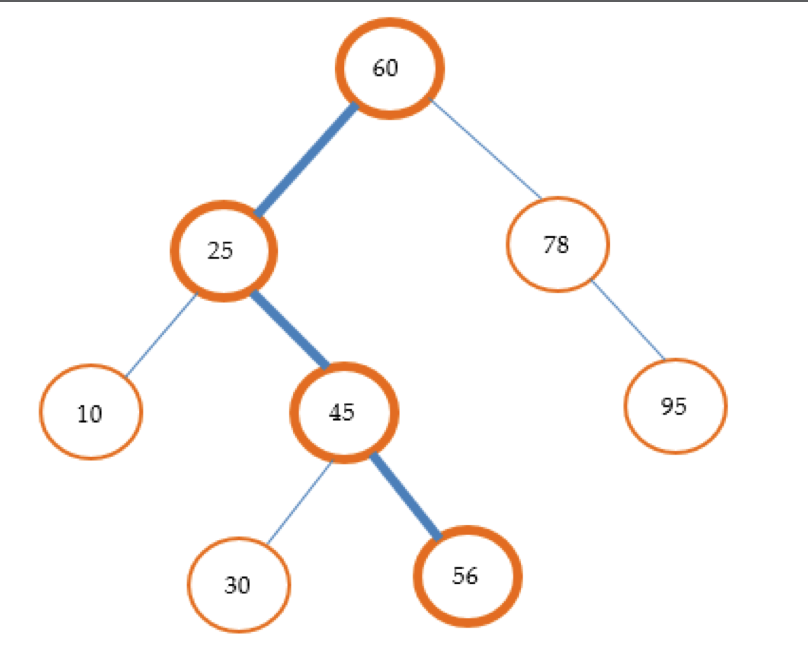 | 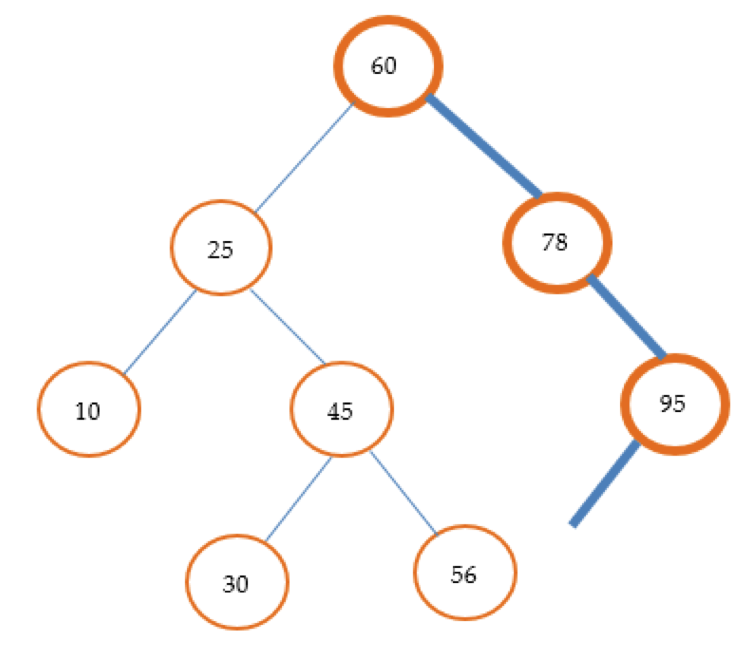 | 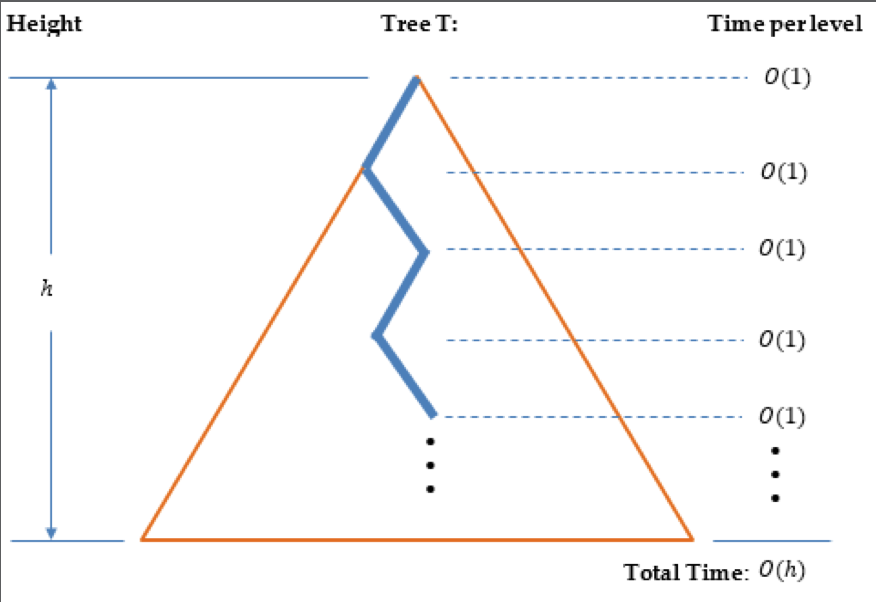 |

Search with a BST can be used to find the target `k` in the tree.

1. Start from the root of the tree. 
2. If the key stored at root is equal to `k`, then return the position of root. 
3. If the key of root is greater than `k`, then search the left subtree of root. 
4. If the key of root is smaller than `k`, then search the right subtree of root. 
5. The searching process is recursive until the target `k` is found in the tree and return `None` if no such key is stored in the tree.

Given that the running time at each level of tree is $O(1)$, and hence the total time of search is $O(h)$, where $h$ is the height of the BST.

#### Inserting a key (e.g. key `80`)

| | | |
| -- | -- | -- |
| 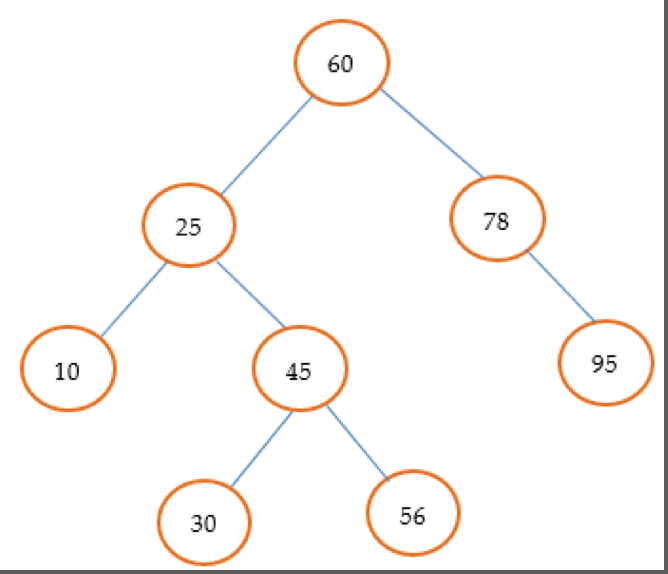 | 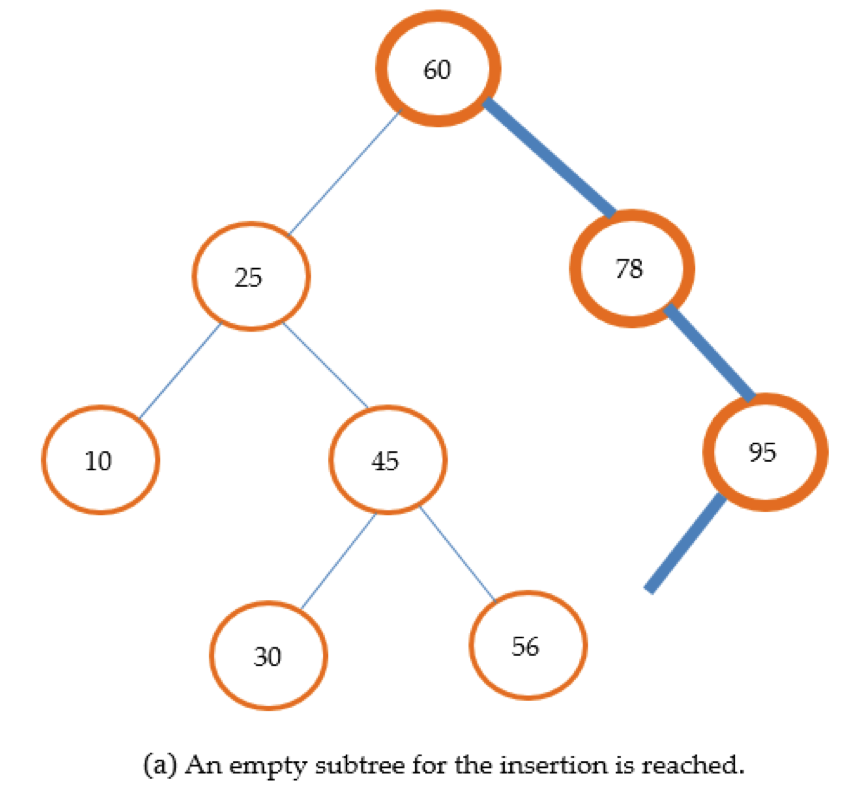 | 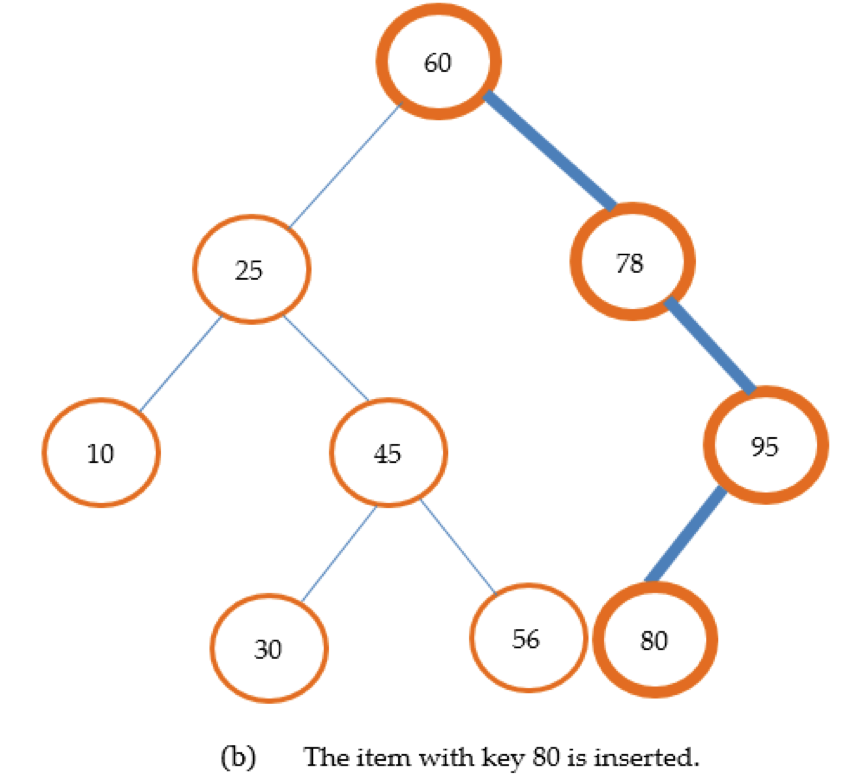 |

1. Search for a key `k`. If there is an item whose key is `k`, the existing value is replaced.
2. If there is no such key, a new node with the key `k` will be inserted into the place of empty subtree which is at the end of the unsuccessful search.

#### Deleting a key

| For node with `1` children (e.g. key `95`) | | For node with `2` children (e.g. key `78`) | |
| -- | -- | -- | -- |
| 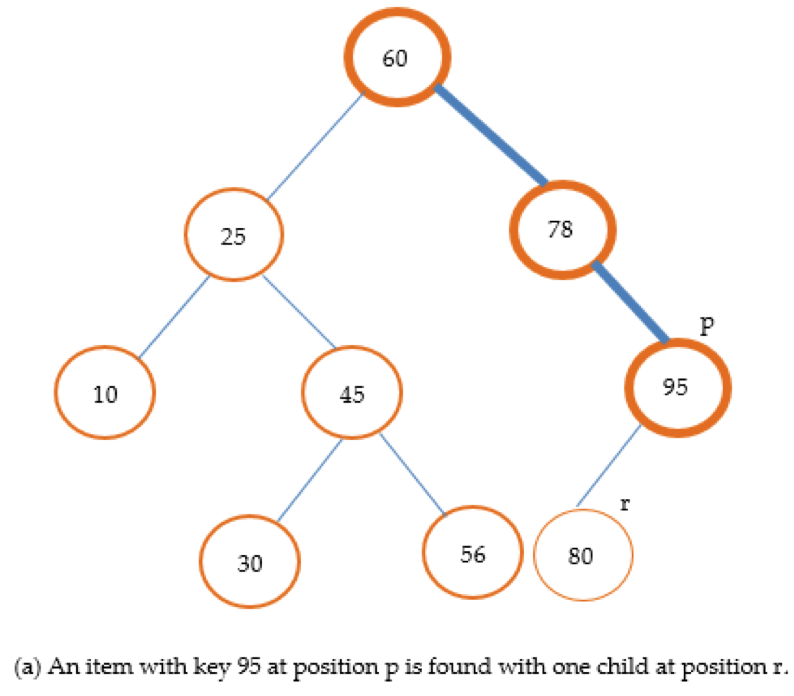 | 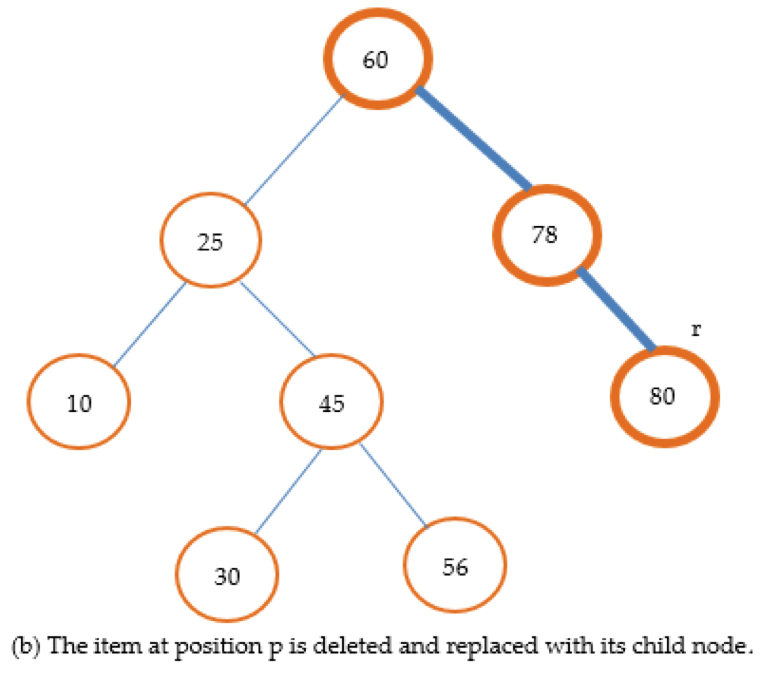 | 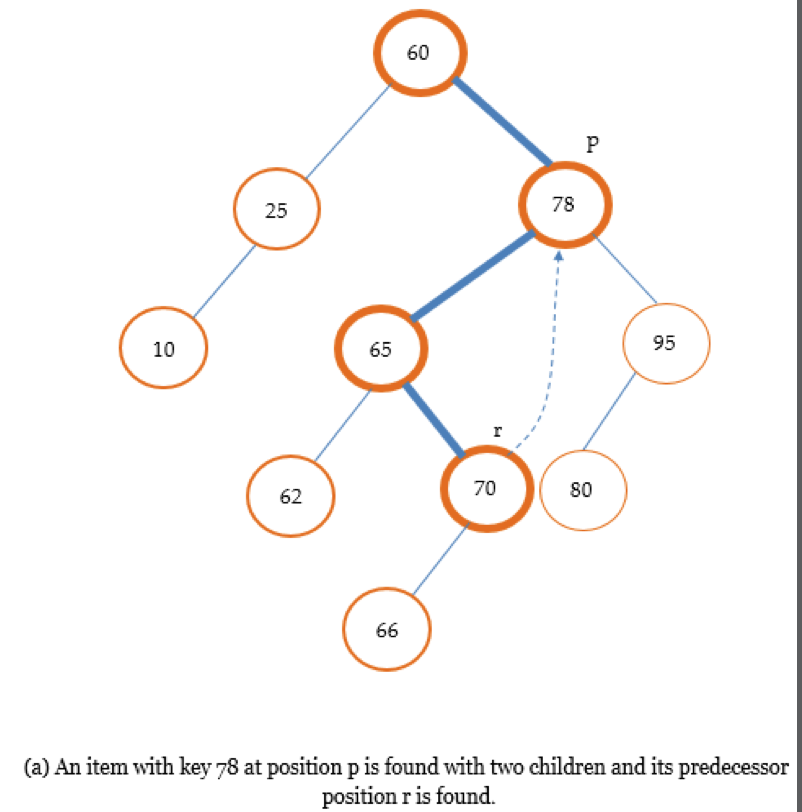 | 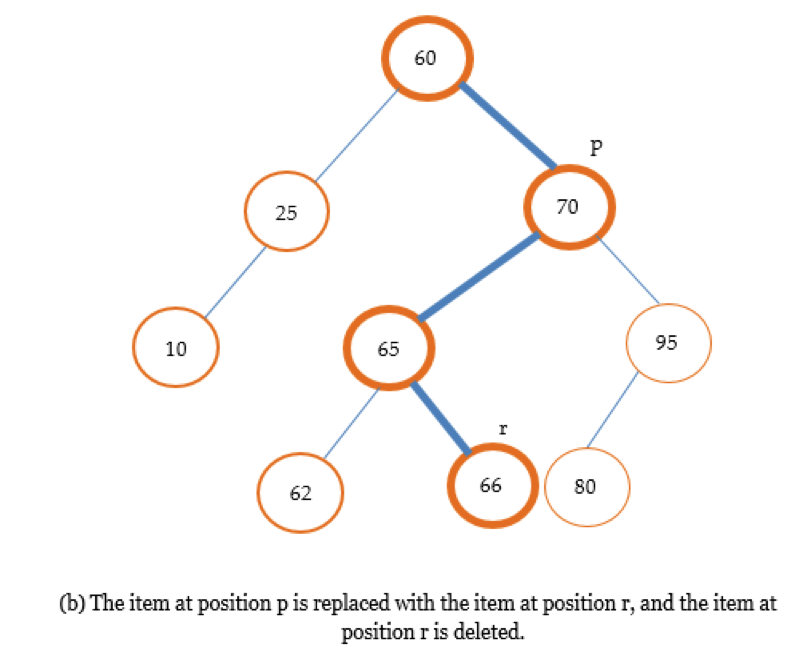 |

1. Use the tree search to find out the position `p` whose stored key is equal to `k`. If it is found successfully, there are two scenarios:
    1. If `p` has only one child, then the node at position `p` is deleted and replaced with its child node. 
    2. If `p` has two children, there are three steps.
        1. The `before(p)` is executed to find a position `r` that stores the largest key but less than `k`. Since `p` has two children, its predecessor is the rightmost node of the left subtree of position `p`.
        2. The item at position `p` is replaced by the item at position `r`. Since `r = before(p)`, the items at left subtree have the keys less than `r`’s key, and the items at right subtree have the keys larger than `r`’s key. Hence the property of binary search tree has remained after the replacement.
        3. After replacement, the item at position `r` is deleted. The reason is that the position `r` is rightmost in a subtree and has at most one child, and hence the deletion can be executed.



#### Transverals

BFS and DFS can be applied

#### In comparison to Heap

1. Heap is balanced tree, BST is not
2. Heap allows duplicates, BST does not
3. BST is ordered data structure, Heap is not

Worst case for building nodes of BST is $O(n\text{log}(n))$, and for Heap is $O(n)$ (heapify).

Below is an implementation of BST,

In [2]:
def tree_pre_order(root):
    if not root: 
        return 
    yield root.val
    for d in tree_pre_order(root.left): yield d
    for d in tree_pre_order(root.right): yield d


def tree_in_order(root):
    if not root:
        return 
    for d in tree_in_order(root.left): yield d
    yield root.val
    for d in tree_in_order(root.right): yield d  

def tree_post_oder(root):
    if not root: 
        return

    for d in tree_post_oder(root.left): yield d
    for d in tree_post_oder(root.right): yield d 
    yield root.val


def tree_level_order(root, reverse=True):
    if not root:
        return []

    result = []
    q = []
    q.append(root)

    while q: 
        level_size = len(q)
        cur_level = []
        
        for _ in range(level_size):
            cur = q.pop(0)
            cur_level.append(cur.val)

            if cur.left: q.append(cur.left)
            if cur.right: q.append(cur.right)
        
        if reverse: result.append(cur_level)
        else: result.insert(0, cur_level)

    return result

In [6]:
class TreeNode: 
    
    def __init__(self, val, left=None, right=None): 
        self.val = val
        self.left = None
        self.right = None 
    
    def __str__(self):
        return "{val: " + str(self.val) + "}"  


class BinarySearchTree: 
    
    def __init__(self, root=None): 
        self.root = root
    
    def first(self):
        if self.is_empty(): 
            return None 
        return self._min(self.root).val
    
    def _min(self, node):
        if node.left:
            return self._min(node.left) 
        return node 
    
    def last(self):
        if self.is_empty(): 
            return None 
        return self._max(self.root).val
    
    def _max(self, node):
        if node.right:
            return self._max(node.right)
        return node 
    
    def before(self, val):
        node = self._search(val, self.root)
        
        if node.left:
            return _max(node.left)
        return None
    
    def after(self, val):
        node = self._search(val, self.root)
        
        if node.right:
            return _min(node.right)
        return None
        
    def search(self, val):
        if self.is_empty():
            return None
        return self._search(val, self.root)

    def _search(self, val, node):
        if node is None: 
            return None
        elif val < node.val:
            return self._search(val, node.left)
        elif val > node.val:
            return self._search(val, node.right)
        return node 
    
    def insert(self, val):
        self.root = self._insert(val, self.root)

    def _insert(self, val, node):
        if node is None: 
            node = TreeNode(val) 
        elif val < node.val:
            node.left = self._insert(val, node.left)
        elif val > node.val:
            node.right = self._insert(val, node.right)
        return node
        
    def delete(self, val):
        self.root = self._delete(val, self.root)
        return self.root

    def _delete(self, val, node):
        if node is None:
            return None
        
        if val < node.val:
            node.left = self._delete(val, node.left)
            return node
        elif val > node.val: 
            node.right = self._delete(val, node.right)
            return node
        else: 
            if node.left is None: 
                right = node.right 
                node.right = None
                return right
            if node.right is None: 
                left = node.left 
                node.left = None
                return left
            
            repl_node = self._max(node.left)
            repl_node.left = self._delete_max(node.left)
            repl_node.right = node.right
            node.left = node.right = None 
            return repl_node

    def _delete_min(self, node):  
        if node.left is None: 
            right = node.right
            node.right = None 
            return right
        
        node.left = self._delete_min(node.left)
        return node

    def _delete_max(self, node):  
        if node.right is None: 
            left = node.left
            node.left = None 
            return left
        
        node.right = self._delete_max(node.right)
        return node
             
    def is_empty(self):
        return not self.root

bst = BinarySearchTree()
data = [50, 77, 55, 29, 10, 30, 66, 18, 80, 51, 90, 17, 88, 79]

for v in data:
    bst.insert(v) 

print("      BST:", tree_level_order(bst.root))
# bst in_order traverse returns a sorted list 
print("   sorted: ", " → ".join([str(v) for v in tree_in_order(bst.root)]))
print("      min: ", bst.first())
print("      max: ", bst.last())
v = 50
print(f"search {v}: ", bst.search(v))

v = 10
print(f"delete {v}:", tree_level_order(bst.delete(v)))

v = 77
print(f"delete {v}:", tree_level_order(bst.delete(v)))

      BST: [[50], [29, 77], [10, 30, 55, 80], [18, 51, 66, 79, 90], [17, 88]]
   sorted:  10 → 17 → 18 → 29 → 30 → 50 → 51 → 55 → 66 → 77 → 79 → 80 → 88 → 90
      min:  10
      max:  90
search 50:  {val: 50}
delete 10: [[50], [29, 77], [18, 30, 55, 80], [17, 51, 66, 79, 90], [88]]
delete 77: [[50], [29, 66], [18, 30, 55, 80], [17, 51, 79, 90], [88]]


### AVL Tree

For BST, there might be some subtrees have more nodes and some subtrees have fewer nodes. The total searching time in the binary search tree is $O(h)$, but due to in-balance of the tree, the worse case would be that all nodes have only one child and searching time will become $O(n)$ where $n$ is the total number of nodes in the BST.

_Think of it as some form of Balanced BST._

Properties:

- Height balanced: `BF` - balance factor. `BF = Height(node.right) - Height(node.left)` and `BF = -1, 0, 1` only.
- Height and no. of nodes: $O(\text{log}(n))$

The AVL tree rebalances during insertions or deletions.

#### Re-balancing

| Left-Left case | Right-Right case | Left-Right case | Right-Left case |
| -- | -- | -- | -- |
| 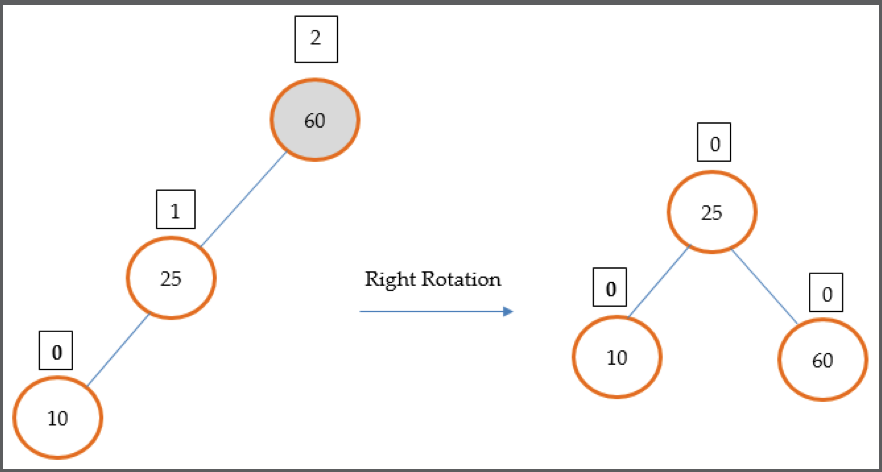 | 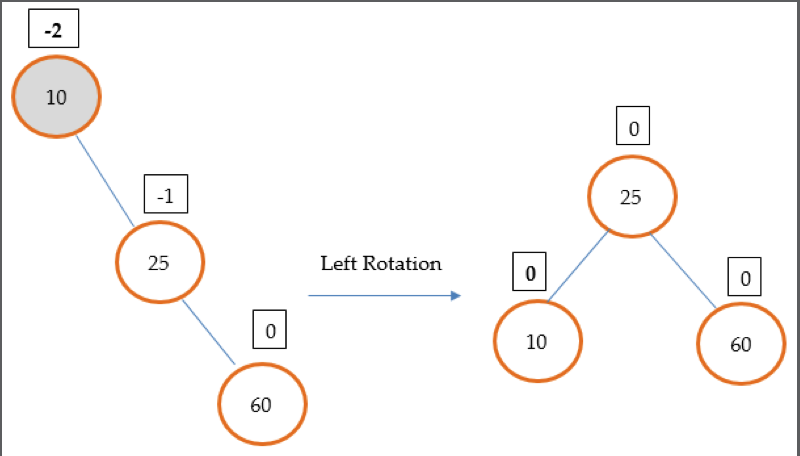 | 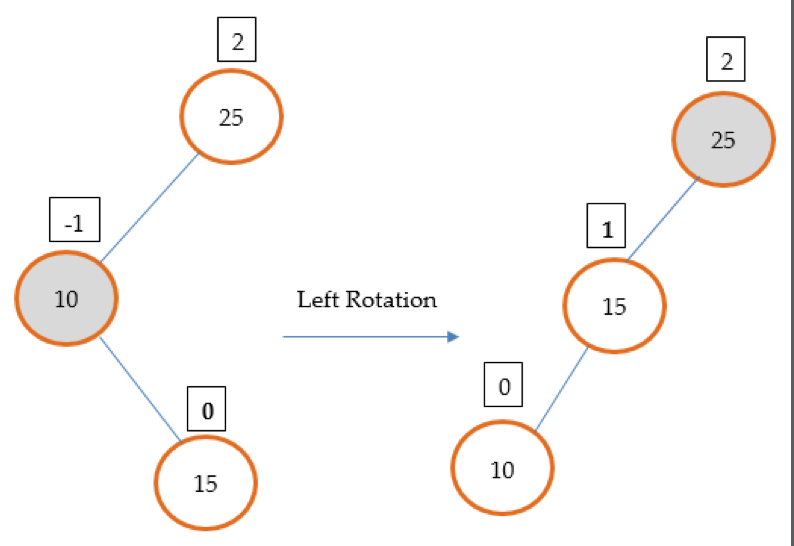 <br>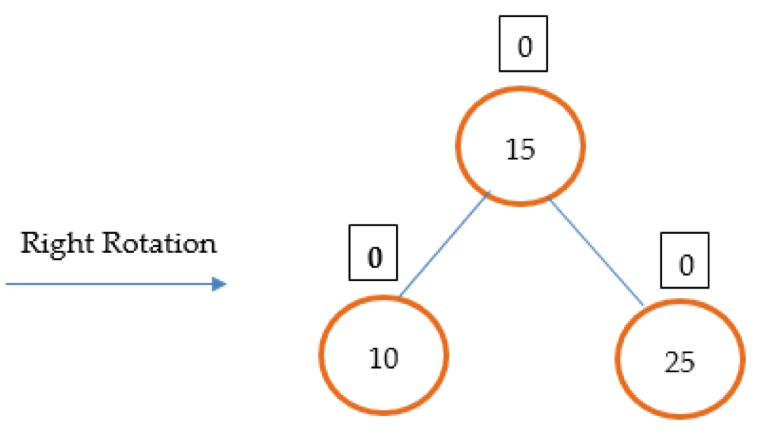 | 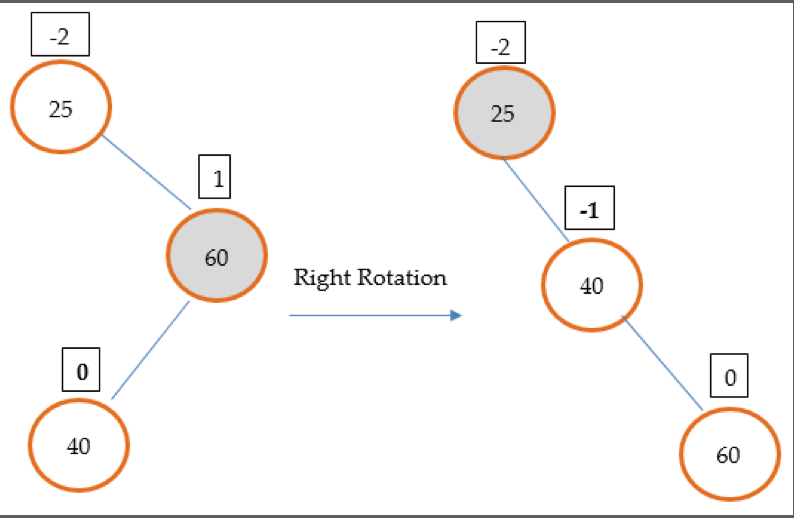 <br>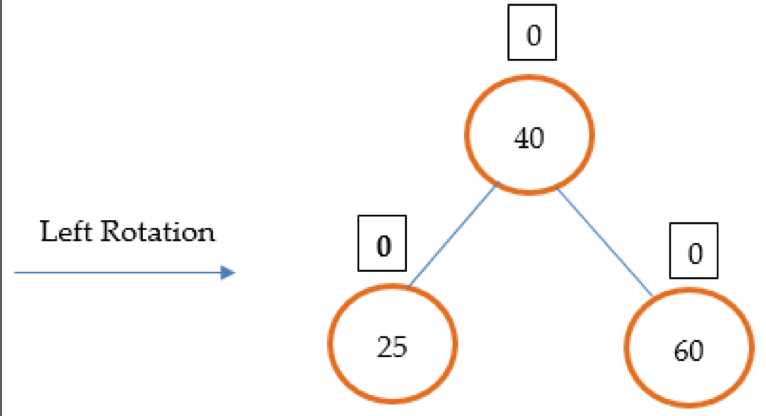 |

- **Left-Left case**: For the node with invalid balance factor, it has only left child and the child has only left child.
    - Balance Factor of `60` is `2`, which violates the height-balance property. Then we rotate the tree with pivot of 60 to the right. After the right rotation, all the nodes have proper balance factors.

- **Right-Right case**: For the node with invalid balance factor, it has only right child and the child has only right child.
    - Balance Factor of `10` is `-2`, which violates the height-balance property. Then we rotate the tree with pivot of 10 to the left. After the left rotation, all the nodes have proper balance factors.

- **Left-Right case**: For the node with invalid balance factor, it has only left child and the child has only right child.
    - Balance Factor of `25` is `2`, which violates the height-balance property. As left child `10` only has right child, we do the left rotation first with pivot of `10`. Then, we rotate the tree with pivot of `25` to the right. After the right rotation, all the nodes have proper balance factors.
    
- **Right-Left case**: For the node with invalid balance factor, it has only right child and the child has only left child.
    - Balance Factor of `25` is `-2`, which violates the height-balance property. As its right child `60` only has left child, we do the right rotation first with pivot of `60`. Then, we rotate the tree with pivot of `25` to the left. After the left rotation, all the nodes have proper balance factors.
    
The AVL tree is re-balanced until all nodes meet the height-balanced property. 

The advantage with AVL tree is that the **height of an AVL tree** which stores $n$ items is $O(\text{log}(n))$. 

The running time at each level of the tree is $O(1)$, and hence the total time is $O(\text{log}(n))$ where $n$ is the node number in the AVL tree.

In [7]:
class AvlNode: 
    
    def __init__(self, val, left=None, right=None): 
        self.val = val
        self.left = None
        self.right = None 
        self.height = 1 # leaf node by default 
    
    def __str__(self):
        return "{val: " + str(self.val) + " height: " + str(self.height) + "}" 


class AvlTree(BinarySearchTree):
    
    def __init__(self, root=None): 
        self.root = root    
    
    @staticmethod
    def node_height(node): 
        if node: 
            return node.height
        return 0
    
    @staticmethod
    def node_bf(node): 
        if node:
            return AvlTree.node_height(node.left) - AvlTree.node_height(node.right)
        return 0

    def right_rotate(self, x): 
        y = x.left 
        t3 = y.right 
    
        y.right = x 
        x.left = t3 

        x.height = max(AvlTree.node_height(x.left), AvlTree.node_height(x.right)) + 1 
        y.height = max(AvlTree.node_height(y.left), AvlTree.node_height(y.right)) + 1 
        
        return y

    def left_rotate(self, x): 
        y = x.right 
        t3 = y.left

        y.left = x 
        x.right = t3 

        x.height = max(AvlTree.node_height(x.left), AvlTree.node_height(x.right)) + 1 
        y.height = max(AvlTree.node_height(y.left), AvlTree.node_height(y.right)) + 1 
        
        return y
    
    def insert(self, val):
        self.root = self._insert(val, self.root)

    def _insert(self, val, node):
        if node is None: 
            return AvlNode(val) 
        elif val < node.val:
            node.left = self._insert(val, node.left)
        elif val > node.val:
            node.right = self._insert(val, node.right)
        
        node.height = 1 + max(AvlTree.node_height(node.left), AvlTree.node_height(node.right))
        
        bf = AvlTree.node_bf(node)

        if bf > 1 and AvlTree.node_bf(node.left) >= 0: 
            return self.right_rotate(node)

        if bf < -1 and AvlTree.node_bf(node.right) <= 0: 
            return self.left_rotate(node)

        if bf > 1 and AvlTree.node_bf(node.left) < 0: 
            node.left = self.left_rotate(node.left)
            return self.right_rotate(node)

        if bf < -1 and AvlTree.node_bf(node.right) > 0:
            node.right = self.right_rotate(node.right)
            return self.left_rotate(node)
        
        return node

    def delete(self, val):
        self.root = self._delete(val, self.root)
        return self.root

    def _delete(self, val, node):
        if node is None:
            return None
        
        reb_node = None
        if val < node.val:
            node.left = self._delete(val, node.left)
            reb_node = node
        elif val > node.val: 
            node.right = self._delete(val, node.right)
            reb_node = node
        else: 
            if node.left is None: 
                right = node.right 
                node.right = None
                reb_node = right
            elif node.right is None: 
                left = node.left 
                node.left = None
                reb_node = left
            else: 
                repl_node = self._max(node.left) 
                repl_node.left = self._delete(repl_node.val, node.left) 
                repl_node.right = node.right
                node.left = node.right = None 
                reb_node = repl_node
        
        if reb_node is None:
            return None
        
        reb_node.height = 1 + max(AvlTree.node_height(reb_node.left), AvlTree.node_height(reb_node.right))
        
        bf = AvlTree.node_bf(reb_node)

        if bf > 1 and AvlTree.node_bf(reb_node.left) >= 0: 
            return self.right_rotate(reb_node)
        
        if bf < -1 and AvlTree.node_bf(reb_node.right) <= 0: 
            return self.left_rotate(reb_node)
        
        if bf > 1 and AvlTree.node_bf(reb_node.left) < 0: 
            reb_node.left = self.left_rotate(reb_node.left)
            return self.right_rotate(reb_node)
        
        if bf < -1 and AvlTree.node_bf(reb_node.right) > 0:
            reb_node.right = self.right_rotate(reb_node.right)
            return self.left_rotate(reb_node)
        
        return reb_node
        
    
    def is_empty(self):
        return not self.root
    

def tree_is_bst(root): 
    values = [v for v in tree_in_order(root)]
    for i in range(1, len(values)): 
        if (values[i] < values[i-1]):
            return False 
    return True

def tree_is_balanced(root): 
    if root is None:
        return True
    if abs(AvlTree.node_bf(root)) > 1: 
        return False 
    return tree_is_balanced(root.left) and tree_is_balanced(root.right)


avl = AvlTree()
data = [50, 77, 55, 29, 10, 30, 66, 18, 80, 51, 90, 17, 88, 79]

for v in data:
    avl.insert(v) 

print("      AVL:", tree_level_order(avl.root))
# bst in_order traverse returns a sorted list 
print("   sorted: ", " → ".join([str(v) for v in tree_in_order(avl.root)]))
print("      min: ", avl.first())
print("      max: ", avl.last())

v = 50
print(f"search {v}: ", avl.search(v))
print("      BST? ", tree_is_bst(avl.root))
print(" balanced? ", tree_is_balanced(avl.root))

v = 10
print(f"delete {v}:", tree_level_order(avl.delete(v)))
print("      BST? ", tree_is_bst(avl.root))
print(" balanced? ", tree_is_balanced(avl.root))

v = 55
print(f"delete {v}:", tree_level_order(avl.delete(v)))
print("      BST? ", tree_is_bst(avl.root))
print(" balanced? ", tree_is_balanced(avl.root))

      AVL: [[50], [29, 66], [17, 30, 55, 80], [10, 18, 51, 77, 90], [79, 88]]
   sorted:  10 → 17 → 18 → 29 → 30 → 50 → 51 → 55 → 66 → 77 → 79 → 80 → 88 → 90
      min:  10
      max:  90
search 50:  {val: 50 height: 5}
      BST?  True
 balanced?  True
delete 10: [[50], [29, 66], [17, 30, 55, 80], [18, 51, 77, 90], [79, 88]]
      BST?  True
 balanced?  True
delete 55: [[50], [29, 80], [17, 30, 66, 90], [18, 51, 77, 88], [79]]
      BST?  True
 balanced?  True


| Operation | BST avg | BST worst | AVL avg | AVL worst |
| -- | -- | -- | -- | -- |
| Search | $O(\text{log}(n))$ | $O(n)$ | $O(\text{log}(n))$ | $O(\text{log}(n))$ |
| Insert | $O(\text{log}(n))$ | $O(n)$ | $O(\text{log}(n))$ | $O(\text{log}(n))$ |
| Delete | $O(\text{log}(n))$ | $O(n)$ | $O(\text{log}(n))$ | $O(\text{log}(n))$ |

### TMA02 Question

#### Question 6

Prune a binary search tree with low and high boundaries.

| Example 1: l=6, h=8 | Example 2: l=3, h=5 |
| -- | -- |
| 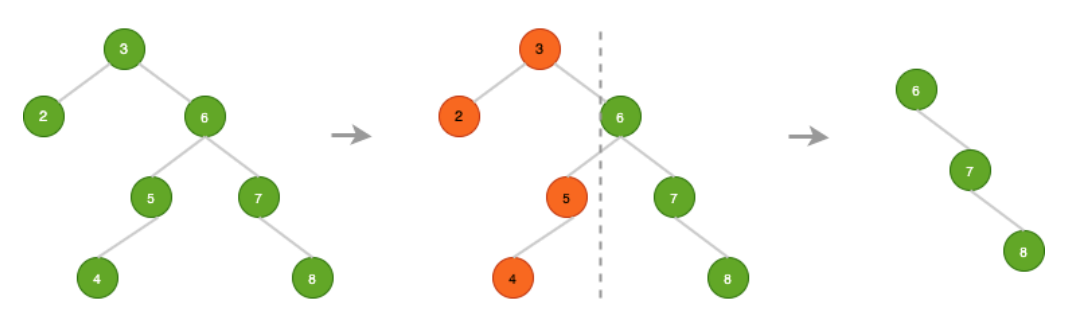 | 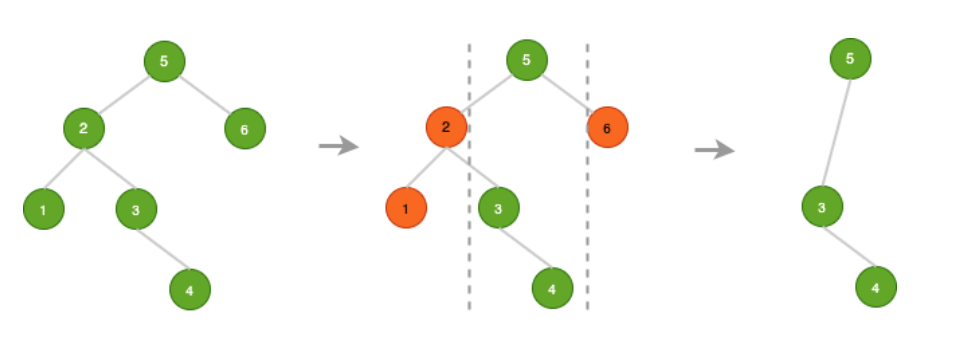 |

Constraints:
- Input root is guaranteed to be a valid binary search tree
- Input `0 <= l <= h <= 10,000`
- Total no. of nodes in the tree in the range `[1, 1000]`
- Value of each node in the tree is unique number
- Pruning should not change the relative structure of the elements that will remain in
the tree
- Return a new root of the pruned tree
- Time Complexity: $O(n)$
- Space Complexity: $O(1)$

In [11]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def prune_bst(root: TreeNode, l:int, h:int) -> TreeNode:
    # complete your code here
    # return the root of the tree after pruning
    if not root:
        return None
    
    if root.val < l:
        return prune_bst(root.right, l, h)
    
    if root.val > h:
        return prune_bst(root.left, l, h)
    
    root.left = prune_bst(root.left, l, h)
    root.right = prune_bst(root.right, l, h)
    return root

n2 = TreeNode(2)
n3 = TreeNode(3)
n4 = TreeNode(4)
n5 = TreeNode(5)
n6 = TreeNode(6)
n7 = TreeNode(7)
n8 = TreeNode(8)
n3.left = n2
n3.right = n6
n6.left = n5
n6.right = n7
n5.left = n4
n7.right = n8
print("binary tree (before): ", " → ".join(map(str, tree_in_order(n3))))

root = prune_bst(n3, 6, 8)
print("binary tree (after): ", " → ".join(map(str, tree_in_order(root))))

n1 = TreeNode(1)
n2 = TreeNode(2)
n3 = TreeNode(3)
n4 = TreeNode(4)
n5 = TreeNode(5)
n6 = TreeNode(6)
n5.left = n2
n5.right = n6
n2.left = n1
n2.right = n3
n3.right = n4
print("binary tree (before): ", " → ".join(map(str, tree_in_order(n5))))

root = prune_bst(n5, 3, 5)
print("binary tree (after): ", " → ".join(map(str, tree_in_order(root))))

binary tree (before):  2 → 3 → 4 → 5 → 6 → 7 → 8
binary tree (after):  6 → 7 → 8
binary tree (before):  1 → 2 → 3 → 4 → 5 → 6
binary tree (after):  3 → 4 → 5
